<img src='prelim_iNUX_logo.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='25%'></img>

# Darcy Column
Simplified Darcy experiment relating hydraulic head to cross-sectional flow.

$q = -k \frac{h_2-h_1}{L}$

* $q$ = Cross-sectional flow, $\frac{m}{s}$
* $k$ = Hydraulic conductivity, $\frac{m}{s}$
* $h_2$ = Hydraulic head at bottom of sediment unit, $m$
* $h_1$ = Hydraulic head at top of sediment unit, $m$
* $L$ = Length of sediment unit, $m$

interactive(children=(BoundedFloatText(value=13.0, description='$h_1, m$:', max=15.0, min=6.0, step=1.0), Boun…

<function __main__.plot_darcy_column(h1, h2, material)>

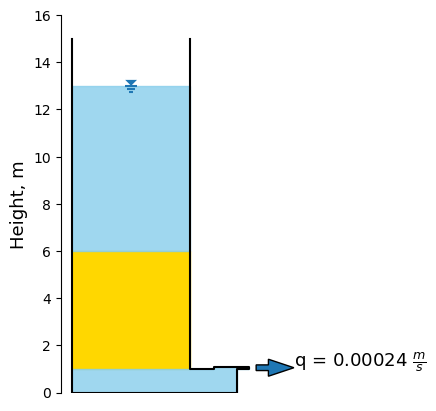

In [1]:
# Initialize libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
import numpy as np
from ipywidgets import *

# Increase pixel resolution
plt.rcParams["figure.dpi"] = 100

# Define material's color and hydraulic conductivity
material_dict= {
        "Sand":{
            "color":"gold",
            "k":1E-4
        },
        "Gravel":{
            "color":"gray",
            "k":1E-2
        },
        "Clay":{
            "color":"peru",
            "k":1E-6
        }
    }

# Define lenghts in m
column_height = 15
column_width = 5
sediment_height = 5
gauge_width = 1

def plot_triangle(x, y, ax, stretch):
    """
    Plot water triangle
    
    Keyword Arguments:
    x -- x postion of triangle tip (water table); float
    y -- y position of triangle tip; float
    ax -- artist to plot on; matplotlib.axes
    stetch -- height of triangle (equal to half its base length); float
    
    Return:
    -
    """
    tgl = [[x, y],[x - stretch, y + stretch],[x + stretch, y + stretch]]
    ax.add_patch(Polygon(tgl))
    ax.hlines(y, x - stretch, x + stretch)
    ax.hlines(y - stretch * 0.5, x - stretch * 0.66, x + stretch * 0.66)
    ax.hlines(y - stretch, x - stretch * 0.33, x + stretch * 0.33)
    

def plot_darcy_column(h1, h2, material):
    """
    Plot Darcy column
    
    Keyword Arguments:
    h1 -- head at top of sediment unit in m; float
    h2 -- head at bottom of sediment unit in m; float
    material -- material of sediment unit. Defined by material_dict; dict
    
    Return:
    -
    """
    # Prepare figure and subplots
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1, 1, 1)
    
    # Adjust plot appearance
    ax.get_xaxis().set_visible(False)
    ax.set_aspect("equal")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([0, column_height + 1])
    
    # Add Descriptor
    ax.set_ylabel("Height, m", fontsize=13)
    
    # Define internal lengths
    distance_gauge_column = gauge_width
    overlap_left = 0.5
    arrow_length_max = 2.
    arrow_width_max = .3
    finite_width = gauge_width * 0.1
    
    # Define verticies
    p1 = (0, column_height)
    p2 = (column_width, column_height)
    p3 = (column_width, gauge_width)
    p4 = (column_width + distance_gauge_column, gauge_width)
    p5 = (column_width + distance_gauge_column, finite_width + h2)
    p6 = (column_width + distance_gauge_column + gauge_width + overlap_left, h2 + finite_width)
    p7 = (column_width + distance_gauge_column + gauge_width + overlap_left, h2)
    p8 = (column_width + distance_gauge_column + gauge_width, h2)
    p9 = (column_width + distance_gauge_column + gauge_width, 0)
    p10 = (0,0)
    p11 = (0, gauge_width)
    
    # Plot material
    ax.add_patch(Rectangle((0,gauge_width), column_width, sediment_height,
                 color = material_dict[material]["color"]))
    
    # Plot water column
    ax.add_patch(Rectangle((0,sediment_height+gauge_width), column_width, h1 - gauge_width - sediment_height,
                 color = "skyblue", alpha=0.8))
    
    # Plot shape lines
    shape = [p2, p3, p4, p5, p6, p7, p8, p9, p10, p1]
    x, y = zip(*shape)
    plt.plot(x, y, c="black")
    
    # Add triangle
    stretch = column_width * 0.05
    x_dist = column_width / 2
    plot_triangle(x_dist, h1, ax, stretch)
    
    # Distinguish between discharge case (h1>h2) and no-discharge case (h1<=h2)
    if h1 > (h2):
        # Calculate actual discharge
        q = material_dict[material]["k"] * (h1 - h2) / (sediment_height)
        # Calculate maximum discharge possible
        q_max = material_dict[material]["k"] * column_height / (sediment_height)
        # Plot discharge arrow. Scale it by maximum discharge possible
        arrow_length = arrow_length_max * q / q_max
        arrow_width = arrow_width_max * q / q_max
        plt.arrow(p6[0] * 1.04,
                 h2 + 0.5 * finite_width, arrow_length, 0,
                 length_includes_head = True,
                 width = arrow_width)
        # Name discharge
        txt = "q = " + str(round(q, 6)) + r" $\frac{m}{s}$"
        plt.text(p6[0] * 1.04 + arrow_length,p6[1], txt, fontsize=13)
        # Adjust filling of gauge
        gauge = [p11, p4, p5, p6, p7, p8, p9, p10]
    else:
        # Only plot water level and no discharge
        p12 = (column_width+distance_gauge_column,h1)
        p13 = (column_width+distance_gauge_column+gauge_width,h1)
        plt.hlines(p12[1], p12[0],p13[0])
        x_dist = column_width + distance_gauge_column + gauge_width / 2
        plot_triangle(x_dist, h1, ax, stretch)
        # Adjust filling of gauge
        gauge = [p11, p4,p12, p13,p9, p10]
    # Add filling of gauge
    ax.add_patch(Polygon(gauge, color="skyblue", alpha=0.8))
    
# h1 widget
h1_WT = widgets.BoundedFloatText(value=column_height - 2, 
                                 min=gauge_width+sediment_height, 
                                 max=column_height, step=1, description=r'$h_1, m$:', 
                                 disabled=False, continuous_update=False)

# h2 widget
h2_WT = widgets.BoundedFloatText(value=1, min=1, max=column_height, step=1, 
                                 description=r'$h_2, m$:', disabled=False,
                                 continuous_update=False)

# Material widget
material_WT = widgets.Dropdown(options=material_dict.keys(), value="Sand", 
                               description="Material:")

# Start interactive plot
interact(plot_darcy_column,
         h1 = h1_WT,
         h2 = h2_WT,
         material = material_WT)

<hr>

2023 | [Thomas Reimann](mailto:thomas.reimann@tu-dresden.de), [Leonard Grabow](mailto:leonard.grabow@mailbox.tu-dresden.de)
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a>